<a href="https://colab.research.google.com/github/leeflesstree/cs471Final/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DecisionTreeClassifier(max_depth=6, random_state=1)


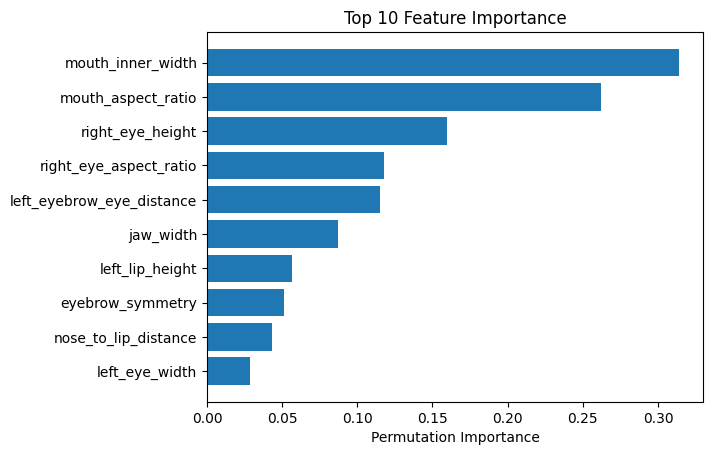

Validation Set:
              precision    recall  f1-score   support

       anger       0.67      1.00      0.80        20
    contempt       1.00      0.88      0.93         8
     disgust       1.00      0.81      0.90        27
        fear       1.00      0.73      0.84        11
       happy       1.00      1.00      1.00        31
     sadness       0.77      0.77      0.77        13
    surprise       1.00      0.97      0.99        38

    accuracy                           0.91       148
   macro avg       0.92      0.88      0.89       148
weighted avg       0.93      0.91      0.92       148



Text(0.5, 1.0, 'Confusion Matrix (Validation)')

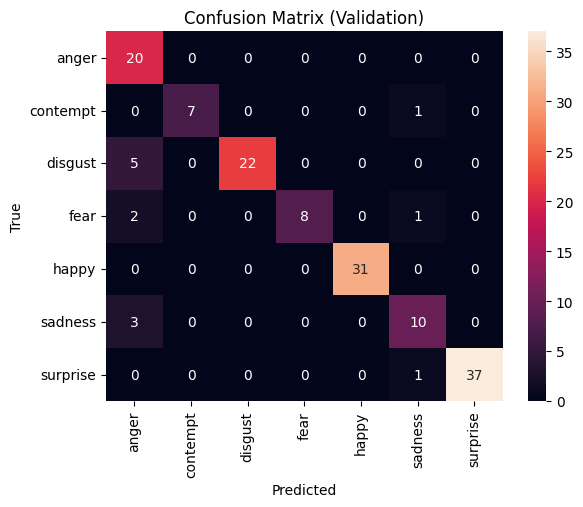

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import csv
import pandas as pd
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)
import seaborn as sns
from sklearn.inspection import permutation_importance

#Prints the confusion matrix with a heatmap
def print_confusion_matrix(y, predicted):
  cmat = confusion_matrix(y, predicted)

  sns.heatmap(cmat, annot=True, fmt='d', xticklabels=['anger',
      'contempt','disgust', 'fear', 'happy', 'sadness', 'surprise'], yticklabels=['anger', 'contempt',
      'disgust', 'fear', 'happy', 'sadness', 'surprise'])

  plt.xlabel('Predicted', fontsize=10)
  plt.ylabel('True', fontsize=10)


#Load data sets
val_df = pd.read_csv('features_val.csv')
train_df = pd.read_csv('features_train.csv')
test_df = pd.read_csv('features_test.csv')

#Split data
X_val = val_df.drop(['emotion', 'image_name'], axis=1)
y_val = val_df['emotion']

X_train = train_df.drop(['emotion', 'image_name'], axis=1)
y_train = train_df['emotion']

X_test = test_df.drop(['emotion', 'image_name'], axis=1)
y_test = test_df['emotion']

#Fine tune hyperparameters for the data set
param_grid = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1, 20, 1)
    }

clf = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=clf, param_grid = param_grid)

grid_search.fit(X_val, y_val)

print(grid_search.best_estimator_)

tree_clf = grid_search.best_estimator_

#Display permutation importance
importance = permutation_importance(tree_clf, X_val, y_val, n_repeats=10)

sorted_idx = importance.importances_mean.argsort()[-10:]

plt.barh(X_val.columns[sorted_idx], importance.importances_mean[sorted_idx])

plt.xlabel('Permutation Importance')

plt.title('Top 10 Feature Importance')

plt.show()

#Print the classification report
print('Validation Set:')

pred = tree_clf.predict(X_val)

print(classification_report(y_val, pred))

print_confusion_matrix(y_val, pred)

plt.title('Confusion Matrix (Validation)', fontsize=12)



Training Set:
              precision    recall  f1-score   support

       anger       0.35      0.58      0.44        95
    contempt       0.53      0.47      0.50        38
     disgust       0.67      0.50      0.57       123
        fear       0.32      0.26      0.29        53
       happy       0.90      0.76      0.82       145
     sadness       0.25      0.31      0.28        58
    surprise       0.98      0.94      0.96       173

    accuracy                           0.64       685
   macro avg       0.57      0.55      0.55       685
weighted avg       0.68      0.64      0.65       685



Text(0.5, 1.0, 'Confusion Matrix (Training)')

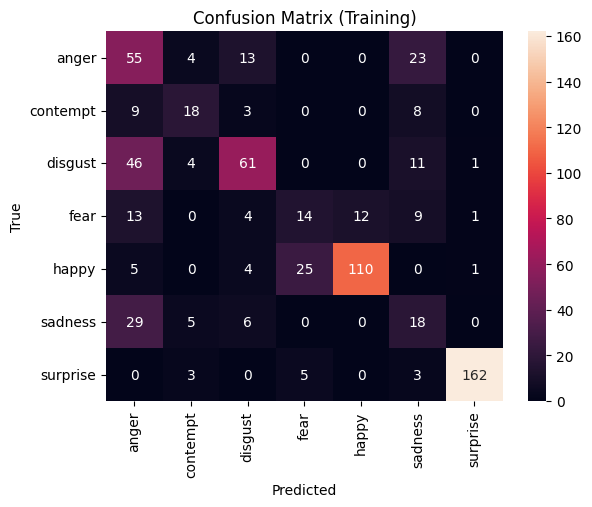

In [5]:
print('Training Set:')

pred = tree_clf.predict(X_train)

print(classification_report(y_train, pred))

print_confusion_matrix(y_train, pred)

plt.title('Confusion Matrix (Training)', fontsize=12)


Testing Set:
              precision    recall  f1-score   support

       anger       0.38      0.65      0.48        20
    contempt       0.33      0.38      0.35         8
     disgust       0.72      0.48      0.58        27
        fear       0.36      0.36      0.36        11
       happy       0.96      0.74      0.84        31
     sadness       0.20      0.23      0.21        13
    surprise       0.97      0.95      0.96        38

    accuracy                           0.64       148
   macro avg       0.56      0.54      0.54       148
weighted avg       0.70      0.64      0.66       148



Text(0.5, 1.0, 'Confusion Matrix (Testing)')

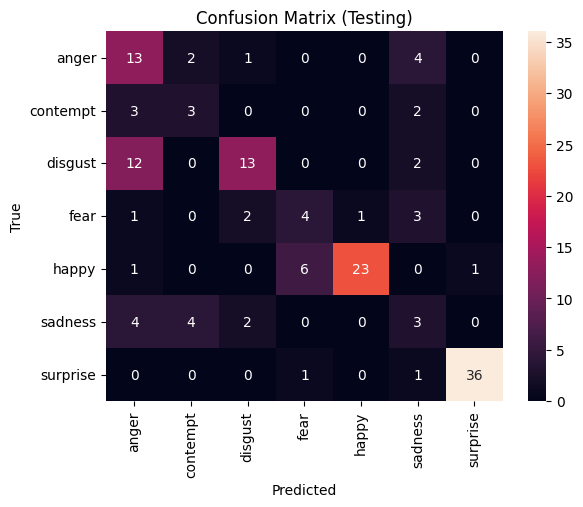

In [6]:
print('Testing Set:')

pred = tree_clf.predict(X_test)

print(classification_report(y_test, pred))

print_confusion_matrix(y_test, pred)

plt.title('Confusion Matrix (Testing)', fontsize=12)

